# Ideia

Montar a grade de horários para 4 turmas, representando turmas do ensino médio (1º ano, 2º ano, 3ª ano e Cursinho). Cada turma tem os seguintes horários regulares:

|   | Segunda | Terça | Quarta | Quinta | Sexta |
|---|---|---|---|---|---|
| 08:20 - 10:00 |  |  |  |  |  |
| 10:15 - 11:55 |  |  |  |  |  |
| 14:00 - 15:40 |  |  |  |  |  |
| 15:55 - 17:35 |  |  |  |  |  |

Todas as turmas devem ter as seguintes disciplinas, com o seguinte número mínimo de aulas por semana (APS):

| Disciplina | APS |
|---|---|
| Matemática | 3 |
| Química | 2 |
| Física | 2 |
| Biologia | 2 |
| Português | 3 |
| História | 3 |
| Geografia | 3 |
| Artes | 1 |
| Inglês | 1 |

Alguns professores podem ministram mais de uma disciplina, a relação professores/disciplina está no arquivo *`disciplinas.csv`*.

## Regras

1. Um professor não pode estar em aula em duas turmas no mesmo horário [Hard Constaint]
1. Todas as turmas devem cumprir as cargas horárias das disciplinas [Hard Constaint]
1. Uma turma não deve ter duas aulas seguidas da mesma matéria (Ex: Matemática -> Matemática -> Química -> Portugês) [Soft Constaint]
1. Deve-se evitar ao máximo que uma turma tenha aulas seguidas com o mesmo professor [Soft Constaint]  
&nbsp;&nbsp;&nbsp;&nbsp;(Ex: Matemática -> Física -> Artes -> Inglês | Artes -> Matemática -> Física -> Inglês)

## Representação

Cada indivíduo será representado por uma matriz 4x20. Onde cada linha representa uma coluna, e cada coluna representa um horário, sendo que, cada grupo de 4 colunas representa um dia da semana.

Por exemplo, o seguinte horário fictício:

|   | Segunda | Terça | Quarta | Quinta | Sexta |
|---|---|---|---|---|---|
| 08:20 - 10:00 | Matemática | Português | Artes | História | Biologia |
| 10:15 - 11:55 | Química | História | Geografia | Português | Física |
| 14:00 - 15:40 | Física | Inglês | Matemática | História | Química |
| 15:55 - 17:35 | Biologia | Geografia | Geografia | Português | Matemática |

Seria representado da seguinte maneira, como uma linha da tabela



["Matemática", "Química", "Física", "Biologia", "Português", "História", "Inglês", "Geografia", "Artes", "Geografia", "Matemática", "Geografia", "História", "Português", "História", "Português", "Biologia", "Física", "Química", "Matemática"]

# Leitura do Dataset

In [81]:
import pandas as pd

dataset = pd.read_csv('disciplinas.csv', sep=';')

dataset

,Nome,Professor,Aulas por Semana
0,Matemática,Manuel,3
1,Química,Sérgio,2
2,Física,Manuel,2
3,Biologia,Sérgio,2
4,Português,Cláudia,3
5,História,Sônia,3
6,Geografia,Sônia,3
7,Artes,Pablo,1
8,Inglês,Cláudia,1


# Criar uma população inicial

## Ideia

Um indivíduo será representado por uma matriz 4x20, onde cada linha representa uma turma (1º ano, 2º ano, 3º ano e Cursinho) e cada coluna representa um horário, sendo que cada grupo de 4 colunas representa um dia da semana.

A tabela será preenchida por números inteiros escolhidos aleatoriamente no intervalo (0, 8). Sendo que cada inteiro representa uma disciplina.

| Índice | Disciplina |
|---|---|
| 0 | Matemática |
| 1 | Química |
| 2 | Física |
| 3 | Biologia |
| 4 | Português |
| 5 | História |
| 6 | Geografia |
| 7 | Artes |
| 8 | Inglês |

Para a população inicial serão criadas 20 matrizes.

In [82]:
import random as rd

populacao_inical = []

for i in range(20):
    temp = []

    for line in range(4):
        temp.append([rd.randrange(0, 9) for _ in range(20)])

    populacao_inical.append(temp)

In [83]:
# Visualizar população inicial
for t in populacao_inical:
    print(t)

[[2, 0, 7, 7, 3, 4, 2, 4, 5, 7, 2, 6, 3, 0, 1, 7, 7, 0, 0, 8], [7, 0, 4, 7, 8, 4, 1, 3, 2, 5, 6, 5, 4, 6, 2, 0, 7, 5, 5, 3], [6, 6, 8, 0, 0, 6, 4, 3, 7, 3, 0, 3, 0, 2, 7, 2, 5, 6, 6, 8], [6, 1, 4, 1, 5, 7, 3, 4, 2, 8, 5, 1, 8, 8, 0, 4, 4, 4, 0, 4]]
[[1, 6, 8, 2, 4, 6, 6, 6, 5, 1, 5, 6, 6, 0, 3, 5, 1, 4, 4, 1], [4, 2, 5, 4, 4, 8, 4, 7, 6, 1, 4, 0, 5, 1, 5, 6, 1, 2, 2, 7], [1, 4, 4, 5, 5, 6, 2, 0, 6, 8, 2, 4, 8, 8, 0, 7, 8, 3, 0, 5], [3, 2, 5, 7, 6, 8, 2, 2, 0, 7, 4, 6, 3, 0, 3, 4, 6, 5, 5, 4]]
[[6, 8, 8, 1, 2, 8, 6, 2, 5, 0, 3, 8, 0, 3, 6, 4, 3, 8, 3, 5], [3, 6, 0, 5, 0, 0, 8, 0, 2, 2, 0, 8, 8, 5, 7, 2, 8, 6, 1, 8], [7, 5, 5, 8, 3, 8, 1, 5, 2, 7, 2, 6, 2, 7, 5, 5, 5, 7, 5, 2], [3, 2, 1, 5, 6, 4, 6, 6, 4, 7, 2, 5, 6, 2, 4, 3, 2, 0, 8, 3]]
[[0, 7, 1, 6, 5, 2, 7, 5, 5, 1, 5, 2, 7, 7, 7, 8, 6, 0, 8, 3], [4, 2, 6, 0, 3, 5, 7, 8, 1, 1, 2, 5, 6, 8, 2, 5, 0, 2, 5, 8], [4, 8, 0, 2, 1, 6, 7, 8, 6, 8, 3, 3, 5, 1, 6, 7, 0, 2, 3, 5], [4, 0, 4, 7, 8, 6, 7, 5, 8, 7, 1, 1, 3, 8, 0, 6, 6, 5, 2, 8]]
[[8,

# Função Fitness

O cálculo da função fitness é feito da seguinte maneira:

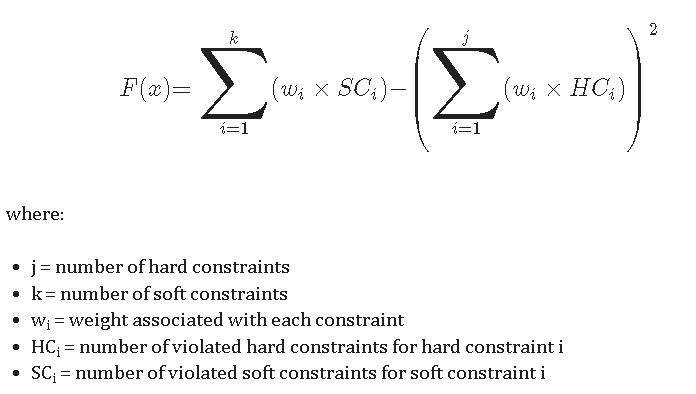

Fonte: [Mahlous AR, Mahlous H. Student timetabling genetic algorithm accounting for student preferences. PeerJ Comput Sci. 2023 Feb 14;9:e1200. doi: 10.7717/peerj-cs.1200. PMID: 37346570; PMCID: PMC10280284.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10280284/)

Ao utilizar essa abordagem para a função fitness, é possível observar que, quanto mais Soft Constraints violadas, mais positivo (> 0) a aptidão tende a ser, e que quanto mais Hard Constraints violadas, mais negativa (< 0) a aptidão tende a ser. Além disso, essa abordagem, junto com um valores satisfatório de pesos, garante que a violação de uma Hard Constraint seja mais impactante para o valor de aptidão.

## Pesos das Constraints

In [84]:
peso_hc1 = 8
peso_hc2 = 8
peso_sc1 = 3
peso_sc2 = 2

## Implementação Função Fitness

In [85]:
def fitness(cromossomo: list[int]) -> float:
    """
    Função que para calcular a aptidão de cada cromossomo

    Inicialmente é calculada a quantidade de vezes que cada constraint é violada
    Com esses valores é então obtido o valor de aptidão com base no seguinte
    cálculo:
         (sc_1*peso_sc1 + sc_2*peso_sc2) - (hc_1*peso_hc1 + hc_2*peso_hc2)**2
    """

    # Contadores constraints
    hc_1 = 0    # Um professor não pode estar em aula em duas turmas no mesmo horário
    hc_2 = 0    # Todas as turmas devem cumprir as cargas horárias das disciplinas
    sc_1 = 0    # Uma turma não deve ter duas aulas seguidas da mesma matéria
    sc_2 = 0    # Deve-se evitar ao máximo que uma turma tenha aulas seguidas com o mesmo professor

    p_ano, s_ano, t_ano, cursinho = cromossomo

    # hc1 -> Identificar se um mesmo professor está em aula em duas turmas no mesmo horário
    for aula_p_ano, aula_s_ano, aula_t_ano, aula_cursinho in zip(p_ano, s_ano, t_ano, cursinho):
        professores = [
            dataset.loc[aula_p_ano]['Professor'],
            dataset.loc[aula_s_ano]['Professor'],
            dataset.loc[aula_t_ano]['Professor'],
            dataset.loc[aula_cursinho]['Professor']
        ]

        professores_unicos = set(professores)

        hc_1 += len(professores) - len(professores_unicos)

    # hc2 -> Todas as turmas devem cumprir as cargas horárias das disciplinas
    # sc1 -> Uma turma não deve ter duas aulas seguidas da mesma matéria
    for turma in cromossomo:
        # hc2
        aps = [turma.count(i) for i in range(len(dataset))]
        aps = [dataset.loc[i]['Aulas por Semana'] == aps[i] for i, _ in enumerate(aps)]

        # sc1
        aulas_seguidas = [turma[i] == turma[i+1] for i in range(len(turma) - 1)]

        # sc2
        professores = [dataset.loc[i]['Professor'] for i in turma]
        professores_seguidos = []
        for i in range(len(professores) - 1):
            # Índices correspondentes aos últimos horários dos dias (3, 7, 11...)
            if i % 4 == 3: continue

            professores_seguidos.append(professores[i] == professores[i+1])

        hc_2 += aps.count(False)
        sc_1 += aulas_seguidas.count(True)
        sc_2 += professores_seguidos.count(True)

    return (sc_1*peso_sc1 + sc_2*peso_sc2) - (hc_1*peso_hc1 + hc_2*peso_hc2)**2

## Ordenar a população com base nas suas aptidões.

Para essa ordenação é criada uma lista auxiliar de tuplas, onde cada tupla possui os seguintes valores (índice do cromossomo, aptidão do cromossomo).

Como o valor da aptidão dos cromossomo pode ser negativa, a ordenação ocorre em duas etapas.

A primeira etapa ordena em ordem crescente os valores maiores que zero.  
A segunda etapa ordena em ordem decrescente os valores menores que zero.

No final têm-se uma lista de tuplas ordenadas onde os valores positivos são sempre melhores que os valores negativos, e os valores positivos são ordenados em ordem crescente, enquanto os negativos em ordem decrescente.

In [86]:
# Gerar lista ordenada com base na aptidão de cada cromossomo
controle_fitness = []
for i, cromossomo in enumerate(populacao_inical):
    controle_fitness.append((i, fitness(cromossomo)))

controle_fitness_pos = []
controle_fitness_neg = []

for popul in controle_fitness:
    if popul[1] > 0:
        controle_fitness_pos.append(popul)
    else:
        controle_fitness_neg.append(popul)

controle_fitness_pos.sort(key=lambda x: x[1])
controle_fitness_neg.sort(key=lambda x: abs(x[1]))

controle_fitness = controle_fitness_pos + controle_fitness_neg
controle_fitness

[(1, -123841),
 (10, -129570),
 (18, -141326),
 (6, -141336),
 (9, -141336),
 (5, -147399),
 (13, -147418),
 (19, -153584),
 (14, -153606),
 (2, -153624),
 (11, -153625),
 (8, -159916),
 (17, -159951),
 (15, -159956),
 (16, -166423),
 (4, -166426),
 (0, -172996),
 (3, -173015),
 (12, -193553),
 (7, -215240)]

# Função Crossover

In [ ]:
def crossover(cromossomo_a: list[int], cromossomo_b: list[int]) -> tuple[list[int], list[int]]:
    cromossomo_c = []
    cromossomo_d = []

    for turma_a, turma_b in zip(cromossomo_a, cromossomo_b):
        temp_c = []
        temp_d = []

        for i, _ in enumerate(turma_a):
            if i % 2 == 0:
                temp_c.append(turma_a[i])
                temp_d.append(turma_b[i])
            else:
                temp_c.append(turma_b[i])
                temp_d.append(turma_a[i])

        cromossomo_c.append(temp_c)
        cromossomo_d.append(temp_d)

    return cromossomo_c, cromossomo_d

# Função de Mutação

In [ ]:
import random as rnd

def mutacao(cromossomo: list[int]) -> None:
    turma1 = rnd.randint(0, 3)
    turma2 = rnd.randint(0, 3)
    while(turma2 == turma1):
        turma2 = rnd.randint(0, 3)
    aula1 = rnd.randint(0, 19)
    aula2 = rnd.randint(0, 19)

    cromossomo[turma1][aula1] = rnd.randint(0, 8)
    cromossomo[turma2][aula2] = rnd.randint(0, 8)


# Algoritmo completo / Sequencial

In [1]:
import pandas as pd
import random as rnd

# Constantes
PESO_HC1 = 0.8
PESO_HC2 = 0.8
PESO_SC1 = 0.3
PESO_SC2 = 0.2
TAM_POPULACAO_INICIAL = 200
GERACOES = 500
TAXA_MUTACAO = 0.1


def fitness(cromossomo: list[int]) -> float:
    """
    Função que para calcular a aptidão de cada cromossomo

    Inicialmente é calculada a quantidade de vezes que cada constraint é violada
    Com esses valores é então obtido o valor de aptidão com base no seguinte
    cálculo:
         (sc_1*PESO_SC1 + sc_2*PESO_SC2) - (hc_1*PESO_HC1 + hc_2*PESO_HC2)**2
    """

    # Contadores constraints
    hc_1 = 0    # Um professor não pode estar em aula em duas turmas no mesmo horário
    hc_2 = 0    # Todas as turmas devem cumprir as cargas horárias das disciplinas
    sc_1 = 0    # Uma turma não deve ter duas aulas seguidas da mesma matéria
    sc_2 = 0    # Deve-se evitar ao máximo que uma turma tenha aulas seguidas com o mesmo professor

    p_ano, s_ano, t_ano, cursinho = cromossomo

    # hc1 -> Identificar se um mesmo professor está em aula em duas turmas no mesmo horário
    for aula_p_ano, aula_s_ano, aula_t_ano, aula_cursinho in zip(p_ano, s_ano, t_ano, cursinho):
        professores = [
            dataset.loc[aula_p_ano]['Professor'],
            dataset.loc[aula_s_ano]['Professor'],
            dataset.loc[aula_t_ano]['Professor'],
            dataset.loc[aula_cursinho]['Professor']
        ]

        professores_unicos = set(professores)

        hc_1 += len(professores) - len(professores_unicos)

    # hc2 -> Todas as turmas devem cumprir as cargas horárias das disciplinas
    # sc1 -> Uma turma não deve ter duas aulas seguidas da mesma matéria
    for turma in cromossomo:
        # hc2
        aps = [turma.count(i) for i in range(len(dataset))]
        aps = [dataset.loc[i]['Aulas por Semana'] == aps[i] for i, _ in enumerate(aps)]

        # sc1
        aulas_seguidas = [turma[i] == turma[i+1] for i in range(len(turma) - 1)]

        # sc2
        professores = [dataset.loc[i]['Professor'] for i in turma]
        professores_seguidos = []
        for i in range(len(professores) - 1):
            # Índices correspondentes aos últimos horários dos dias (3, 7, 11...)
            if i % 4 == 3: continue

            professores_seguidos.append(professores[i] == professores[i+1])

        hc_2 += aps.count(False)
        sc_1 += aulas_seguidas.count(True)
        sc_2 += professores_seguidos.count(True)

    return (sc_1*PESO_SC1 + sc_2*PESO_SC2) - (hc_1*PESO_HC1 + hc_2*PESO_HC2)**2


def crossover(cromossomo_a: list[int], cromossomo_b: list[int]) -> tuple[list[int], list[int]]:
    cromossomo_c = []
    cromossomo_d = []

    for turma_a, turma_b in zip(cromossomo_a, cromossomo_b):
        temp_c = []
        temp_d = []

        for i, _ in enumerate(turma_a):
            if i % 2 == 0:
                temp_c.append(turma_a[i])
                temp_d.append(turma_b[i])
            else:
                temp_c.append(turma_b[i])
                temp_d.append(turma_a[i])

        cromossomo_c.append(temp_c)
        cromossomo_d.append(temp_d)

    return cromossomo_c, cromossomo_d


def mutacao(cromossomo: list[int]) -> None:
    turma1 = rnd.randint(0, 3)
    turma2 = rnd.randint(0, 3)
    while(turma2 == turma1):
        turma2 = rnd.randint(0, 3)
    aula1 = rnd.randint(0, 19)
    aula2 = rnd.randint(0, 19)

    cromossomo[turma1][aula1] = rnd.randint(0, 8)
    cromossomo[turma2][aula2] = rnd.randint(0, 8)


if __name__ == "__main__":
    # Ler o dataset
    dataset = pd.read_csv('disciplinas.csv', sep=';')

    # Criar população inicial
    populacao_inicial = []

    for i in range(TAM_POPULACAO_INICIAL):
        temp = []

        for line in range(4):
            temp.append([rnd.randrange(0, 9) for _ in range(20)])

        populacao_inicial.append(temp)

    # Gerar lista ordenada com base na aptidão de cada cromossomo
    controle_fitness = []
    for i, cromossomo in enumerate(populacao_inicial):
        controle_fitness.append((i, fitness(cromossomo)))

    controle_fitness_pos = []
    controle_fitness_neg = []

    for popul in controle_fitness:
        if popul[1] > 0:
            controle_fitness_pos.append(popul)
        else:
            controle_fitness_neg.append(popul)

    controle_fitness_pos.sort(key=lambda x: x[1])
    controle_fitness_neg.sort(key=lambda x: abs(x[1]))

    controle_fitness = controle_fitness_pos + controle_fitness_neg

    print(populacao_inicial[controle_fitness[0][0]], controle_fitness[0][1])
    print(populacao_inicial[controle_fitness[1][0]], controle_fitness[1][1])
    print(populacao_inicial[controle_fitness[2][0]], controle_fitness[2][1])

    for i in range(GERACOES):
        # Escolher cromossomos para realizar crossover
        cromossomo_a, cromossomo_b = crossover(populacao_inicial[controle_fitness[0][0]], populacao_inicial[controle_fitness[1][0]])

        populacao_inicial[-1] = cromossomo_a
        populacao_inicial[-2] = cromossomo_b

        controle_fitness[-1] = (len(populacao_inicial) - 1, fitness(cromossomo_a))
        controle_fitness[-2] = (len(populacao_inicial) - 2, fitness(cromossomo_b))

        if rnd.random() <= TAXA_MUTACAO:
            pos = rnd.randint(0, len(populacao_inicial) - 1)
            mutacao(populacao_inicial[pos])

            for i, controle in enumerate(controle_fitness):
                if controle[0] == pos:
                    controle_fitness[i] = (pos, fitness(populacao_inicial[pos]))

        controle_fitness_pos = []
        controle_fitness_neg = []

        for popul in controle_fitness:
            if popul[1] > 0:
                controle_fitness_pos.append(popul)
            else:
                controle_fitness_neg.append(popul)

        controle_fitness_pos.sort(key=lambda x: x[1])
        controle_fitness_neg.sort(key=lambda x: abs(x[1]))

        controle_fitness = controle_fitness_pos + controle_fitness_neg

    print("#"*300)
    print(populacao_inicial[controle_fitness[0][0]], controle_fitness[0][1])
    print(populacao_inicial[controle_fitness[1][0]], controle_fitness[1][1])
    print(populacao_inicial[controle_fitness[2][0]], controle_fitness[2][1])



[[1, 1, 3, 0, 3, 4, 6, 3, 5, 0, 5, 2, 2, 7, 6, 3, 4, 8, 8, 2], [2, 0, 4, 1, 8, 3, 6, 1, 3, 5, 5, 6, 8, 1, 8, 1, 6, 4, 2, 4], [7, 7, 5, 6, 5, 4, 1, 2, 4, 1, 3, 5, 6, 8, 3, 2, 1, 6, 2, 1], [6, 5, 2, 3, 5, 7, 4, 7, 0, 6, 7, 0, 2, 1, 0, 4, 6, 5, 7, 4]] -920.2600000000001
[[2, 8, 6, 0, 4, 2, 8, 2, 3, 4, 4, 2, 3, 8, 8, 4, 1, 0, 5, 0], [4, 3, 8, 0, 1, 2, 2, 3, 0, 1, 8, 6, 7, 0, 0, 7, 0, 1, 0, 1], [7, 6, 2, 8, 5, 2, 4, 4, 0, 0, 5, 2, 1, 1, 0, 3, 3, 4, 8, 5], [6, 3, 8, 1, 7, 4, 2, 0, 7, 5, 6, 1, 2, 2, 5, 0, 6, 3, 1, 4]] -1018.7
[[5, 3, 2, 0, 0, 6, 5, 0, 7, 5, 4, 3, 4, 6, 0, 1, 1, 2, 6, 3], [5, 5, 0, 0, 3, 1, 4, 8, 8, 6, 2, 4, 5, 0, 6, 2, 5, 8, 8, 6], [8, 0, 8, 1, 4, 8, 0, 7, 7, 0, 8, 4, 6, 3, 4, 5, 5, 6, 5, 2], [2, 1, 6, 7, 1, 4, 3, 7, 2, 0, 1, 5, 1, 1, 3, 6, 7, 7, 2, 6]] -1069.8400000000004
##############################################################################################################################################################################################################